# Problem 1

### Part A

In [158]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# Set parameters
R = 1 # placeholder R value
ns = 0.96
alpha = 2
keq = 0.02 # h * Mpc^-1, NOTE!!! h ~ 0.67
D = 1 # at z=0 D=1
A = 1 # We assume this

# Define function for variance of the density field smoothed with spherical top-hat
def variance(k):

  P = A*(D**2)*((k/keq)**ns)*((1+((k/keq)**2))**-alpha)
  W = (3/((k*R)**3))*(np.sin(k*R)-((k*R)*np.cos(k*R)))
  var = (1/(2*(np.pi**2))) * P * (W**2) * (k**2)

  return var

In [160]:
# Calculate variance for multiple values of R (using scipy.integrate.simpson)

R_min = 0
R_max = 1E3
bound_min = -10 # estimating this to be ~0
bound_max = 10 # estimating this to be ~infinity
N=1000
R_array = np.linspace(R_min,R_max,N)
k_array = np.logspace(bound_min,bound_max,N)

In [161]:
Vars = []
for R in R_array:
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Vars.append(Var)

<ipython-input-159-fad9d8571c1b>:13: RuntimeWarning: divide by zero encountered in divide
  W = (3/((k*R)**3))*(np.sin(k*R)-((k*R)*np.cos(k*R)))
<ipython-input-159-fad9d8571c1b>:13: RuntimeWarning: invalid value encountered in multiply
  W = (3/((k*R)**3))*(np.sin(k*R)-((k*R)*np.cos(k*R)))


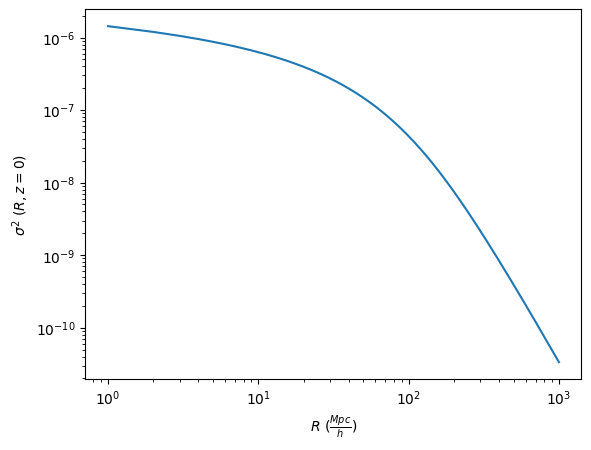

In [162]:
plt.plot(R_array,Vars)
plt.xlabel(r'$ R\ (\frac{Mpc}{h}) $')
plt.ylabel(r"$ \sigma^2 \ (R,z=0) $")
plt.xscale("log")
plt.yscale("log")
plt.show()

### Part B

In [163]:
M_min = 0
M_max = 15
M_array = np.logspace(M_min,M_max,N)

rho = 9.9*10**-30 # mean matter density g/cm³ (looked up)
rho = 2.775e11 * 0.3  # mean density of universe in Msun/Mpc^3 (assume Omega_m = 0.3)
Vars = []
for M in M_array:
  R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Vars.append(Var)
sigma = np.array(Vars)**0.5

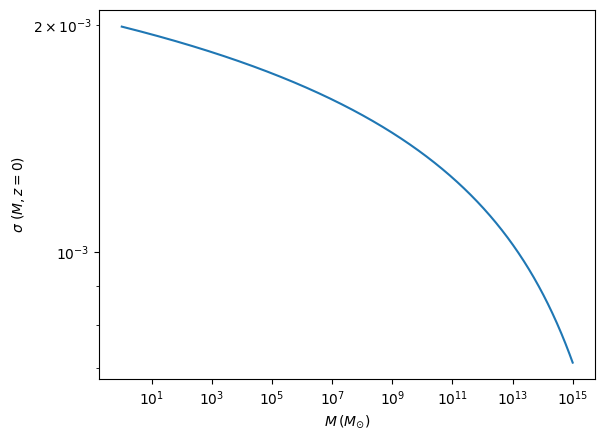

In [164]:
plt.plot(M_array,sigma)
plt.xlabel(r'$ M \, (M_{\odot}) $')
plt.ylabel(r'$ \sigma \ (M, z=0) $')
plt.xscale("log")
plt.yscale("log")
plt.show()

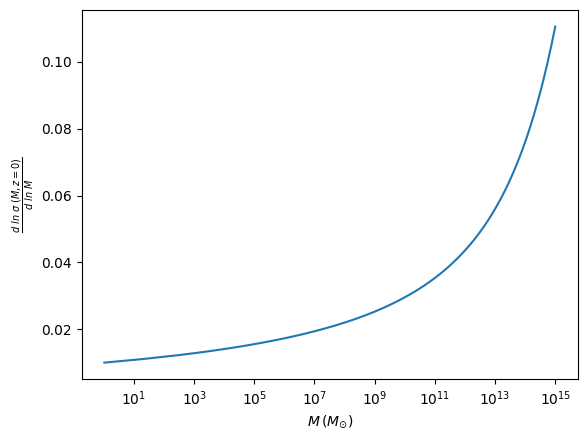

In [165]:
# dln(sigma)/dln(M) using np.diff

dy = np.diff(np.log(sigma))
dx = np.diff(np.log(M_array))
deriv = dy / dx
deriv = np.abs(deriv)

plt.plot(M_array[1:],deriv)
plt.xlabel(r'$ M \, (M_{\odot}) $')
plt.ylabel(r'$ \frac{d\ ln\ \sigma \ (M, z=0) }{d\ ln\ M} $')
plt.xscale("log")
plt.show()

### Part C

In [166]:
# solve for A given R, sigma8

R = 8 # h^−1 Mpc # assign new R value for the integral
sigma8 = 0.8
# z = 0 # assumed before

var = variance(k_array)
Var = scipy.integrate.simpson(var, x=k_array)
Var8 = sigma8 ** 2
A = Var8 / Var
print("A: {}".format(A))

A: 905899.6789267928


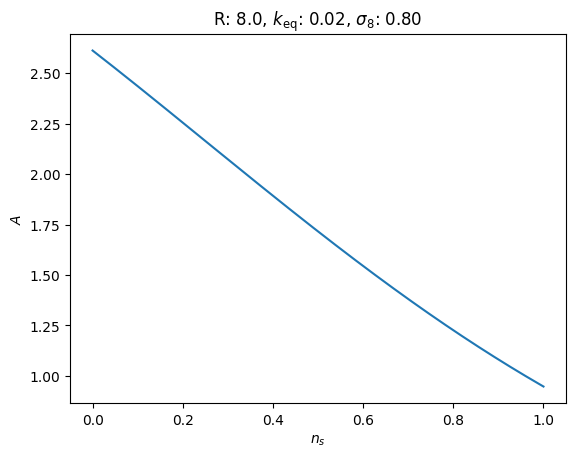

In [167]:
# A vs. ns

NS = np.linspace(0,1,N)
AA = []
for ns in NS:
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Var8 = sigma8 ** 2
  AA.append(Var8/Var)

plt.plot(NS,AA)
plt.xlabel(r"$ n_s $")
plt.ylabel(r"$ A $")
plt.title(r"R: {:.1f}, $k_{{\mathrm{{eq}}}}$: {:.2f}, $\sigma_8$: {:.2f}".format(R, keq, sigma8))
plt.show()

A decreases almost linearly with ns!

<ipython-input-159-fad9d8571c1b>:12: RuntimeWarning: divide by zero encountered in divide
  P = A*(D**2)*((k/keq)**ns)*((1+((k/keq)**2))**-alpha)
<ipython-input-159-fad9d8571c1b>:12: RuntimeWarning: invalid value encountered in multiply
  P = A*(D**2)*((k/keq)**ns)*((1+((k/keq)**2))**-alpha)


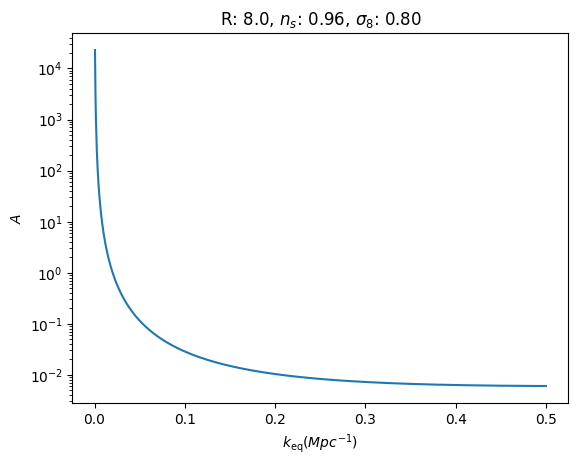

In [168]:
# A vs. keq

ns = 0.96
KEQ = np.linspace(0,0.5,N)
AA = []
for keq in KEQ:
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Var8 = sigma8 ** 2
  AA.append(Var8/Var)

plt.plot(KEQ,AA)
plt.xlabel("$k_{{\mathrm{{eq}}}} (Mpc^{-1})$")
plt.ylabel(r"$ A $")
plt.title(r"R: {:.1f}, $n_s$: {:.2f}, $\sigma_8$: {:.2f}".format(R, ns, sigma8))
plt.yscale("log")
plt.show()

A decreases rapidly with keq!

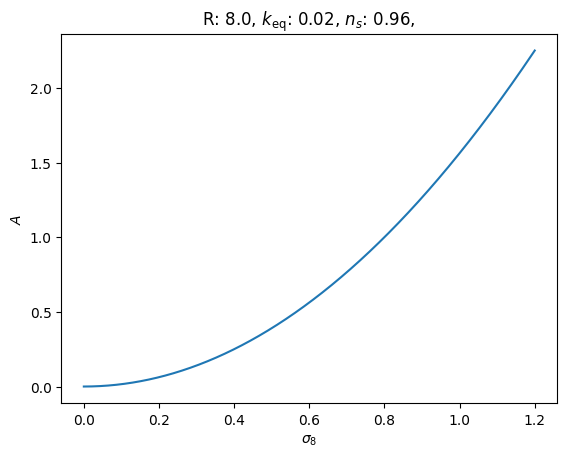

In [169]:
#  A vs. sigma8

keq = 0.02 # h * Mpc^-1, NOTE!!! h ~ 0.67
SIGMA8 = np.linspace(0,1.2,N)
AA = []
for sigma8 in SIGMA8:
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Var8 = sigma8 ** 2
  AA.append(Var8/Var)

plt.plot(SIGMA8,AA)
plt.xlabel(r"$ \sigma_8 $")
plt.ylabel(r"$ A $")
plt.title(r"R: {:.1f}, $k_{{\mathrm{{eq}}}}$: {:.2f}, $n_s$: {:.2f}, ".format(R, keq, ns))
plt.show()

A increases rapidly with sigma8!

### Part D

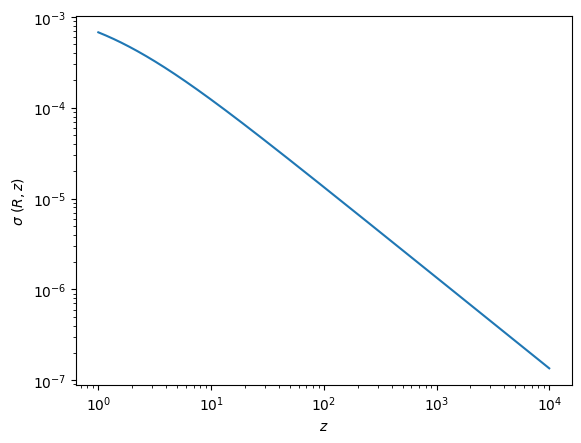

In [170]:
# Set parameters
ns = 0.96
alpha = 2
keq = 0.02 # h * Mpc^-1, NOTE!!! h ~ 0.67
D = 1 # at z=0 D=1
A = 1 # We assume this

M = 1E10 # placeholder mass (Msol)
R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
var0 = variance(k_array)
Var0 = scipy.integrate.simpson(var0, x=k_array)
sigma0 = Var0 ** 0.5

z_low = 0
z_high = 4
z = np.logspace(z_low,z_high,N)
sigma_z = sigma0 / (1+z)

plt.plot(z,sigma_z)
plt.xlabel(r"$ z $")
plt.ylabel(r"$ \sigma \ (R,z) $")
plt.xscale("log")
plt.yscale("log")
plt.show()

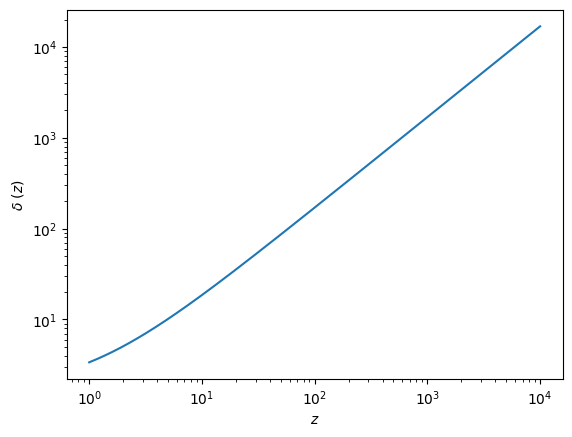

In [171]:
delta0 = 1.686 # looked this up
delta_z = delta0*(1+z)

plt.plot(z,delta_z)
plt.xlabel(r"$ z $")
plt.ylabel(r"$ \delta \ (z) $")
plt.xscale("log")
plt.yscale("log")
plt.show()

delta(z) depends almost linearly with z!

### Part E

In [172]:
M_min = 6
M_max = 15
N = 10000
M_array = np.logspace(M_min,M_max,N)
z_s = [0,1,2]

Not sure what my ns and keq should be.... my choice of them affect the value of sigma, which affects the value of n. Made you different choices below and will carry on with the one I like the most.

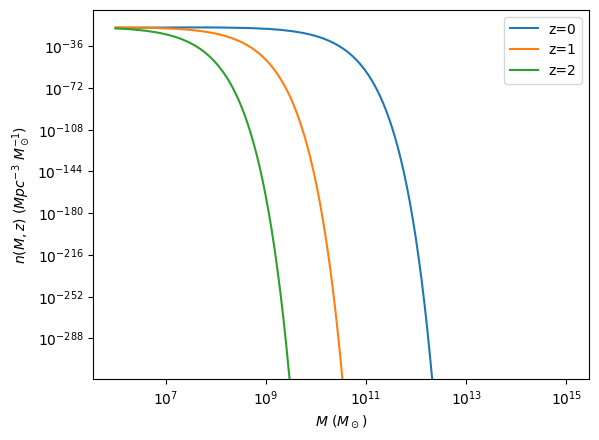

In [173]:
ns = 3
keq = 0.06 # h * Mpc^-1, NOTE!!! h ~ 0.67

for z in z_s:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="z={}".format(z))

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$M\ (M_\odot)$')
plt.ylabel(r'$n(M, z)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.show()

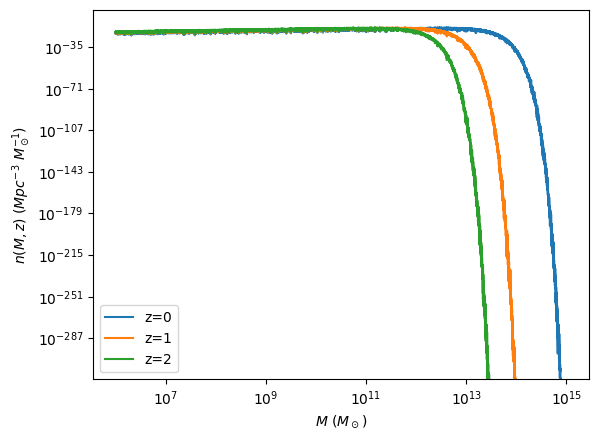

In [174]:
ns = 5
keq = 0.1 # h * Mpc^-1, NOTE!!! h ~ 0.67

for z in z_s:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="z={}".format(z))

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$M\ (M_\odot)$')
plt.ylabel(r'$n(M, z)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.show()

<ipython-input-175-19a3e3ae3e9d>:11: RuntimeWarning: divide by zero encountered in log
  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))
<ipython-input-175-19a3e3ae3e9d>:15: RuntimeWarning: divide by zero encountered in divide
  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv
<ipython-input-175-19a3e3ae3e9d>:15: RuntimeWarning: invalid value encountered in multiply
  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv


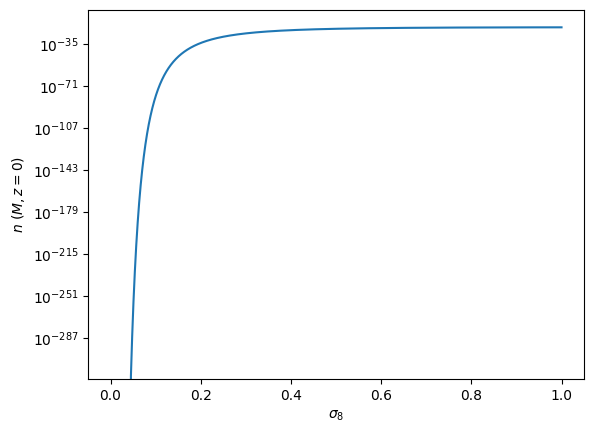

In [175]:
# Vary σ8

z = 0
alpha = 2
ns = 3
keq = 0.06 # h * Mpc^-1, NOTE!!! h ~ 0.67

SIGMA8 = np.linspace(0,1,N)
sigma = SIGMA8

deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

delta = delta0*(1+z)

n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

plt.plot(SIGMA8,n)

plt.xlabel(r"$ \sigma_8 $")
plt.ylabel(r"$ n \ (M,z=0) $")
plt.yscale("log")
plt.show()

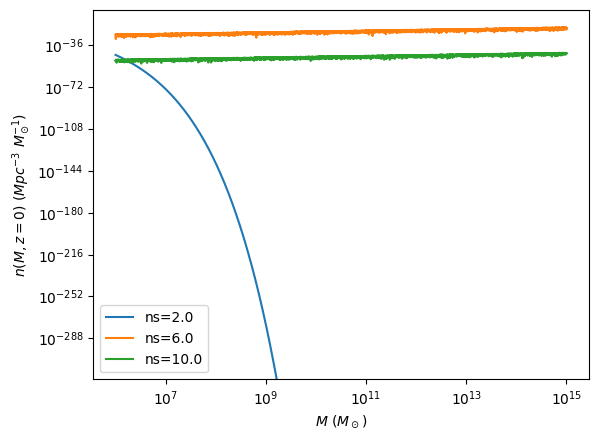

In [176]:
# Vary ns

sigma8 = 0.8
NN=3

NS = np.linspace(2,10,NN)

for ns in NS:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="ns={}".format(round(ns * 10) / 10))

plt.xlabel(r'$M\ (M_\odot)$')
plt.ylabel(r'$n(M, z=0)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

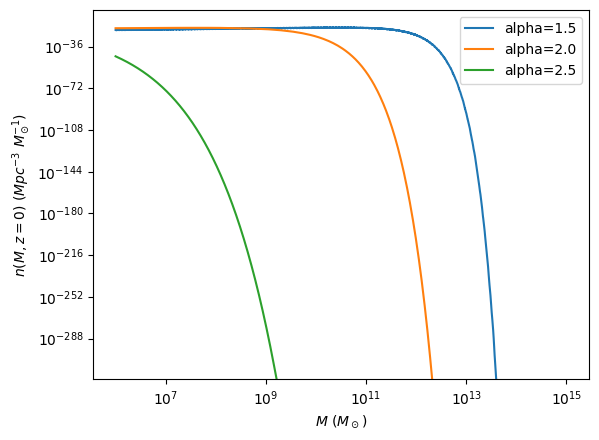

In [177]:
# Vary α

ns = 3
NN = 3

ALPHA = np.linspace(1.5,2.5,NN)
for alpha in ALPHA:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="alpha={}".format(round(alpha * 10) / 10))

plt.legend()
plt.xlabel(r'$M\ (M_\odot)$')
plt.ylabel(r'$n(M, z=0)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.xscale("log")
plt.yscale("log")
plt.show()

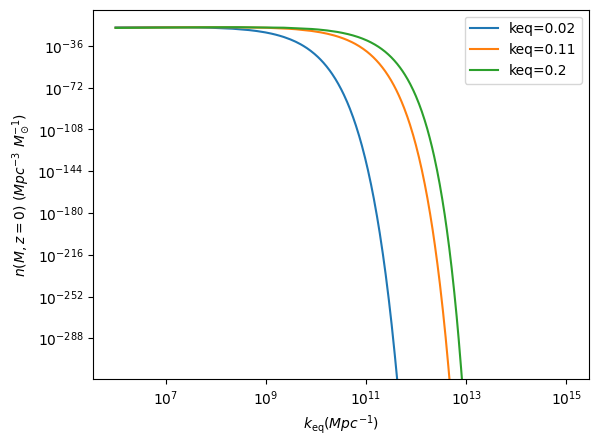

In [178]:
# Vary keq

alpha = 2
NN = 3

KEQ = np.linspace(0.02,0.2,NN)
for keq in KEQ:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="keq={}".format(round(keq, 3)) )

plt.xlabel("$k_{{\mathrm{{eq}}}} (Mpc^{-1})$")
plt.ylabel(r'$n(M, z=0)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

### Part F. Shown in separate .ipynb.

# Problem 2

In [201]:
!pip install hmf

### Part A

In [202]:
z = 0
Mhalo_min = 1E10
Mhalo_max = 1E15

In [203]:
from hmf import MassFunction
mf = MassFunction(z=0)
mf.quantities_available()

/usr/local/lib/python3.11/dist-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


['ERROR_ON_BAD_MDEF',
 '_dlnsdlnm',
 '_growth_factor_fn',
 '_gtm',
 '_normalisation',
 '_power0',
 '_sigma_0',
 '_unn_sig8',
 '_unn_sigma0',
 '_unnormalised_lnT',
 '_unnormalised_power',
 'cosmo',
 'delta_k',
 'dndlnm',
 'dndlog10m',
 'dndm',
 'filter',
 'fsigma',
 'growth',
 'growth_factor',
 'halo_overdensity_crit',
 'halo_overdensity_mean',
 'hmf',
 'how_big',
 'k',
 'lnsigma',
 'm',
 'mass_nonlinear',
 'mdef',
 'mean_density',
 'mean_density0',
 'n_eff',
 'ngtm',
 'nonlinear_delta_k',
 'nonlinear_power',
 'normalised_filter',
 'nu',
 'power',
 'radii',
 'rho_gtm',
 'rho_ltm',
 'sigma',
 'transfer',
 'transfer_function']

In [204]:
MassFunction.parameter_info()

cosmo_model : instance of `astropy.cosmology.FLRW` subclass
    The basis for the cosmology -- see astropy documentation. Can be a custom
    subclass. Defaults to Planck18.

cosmo_params : dict
    Parameters for the cosmology that deviate from the base cosmology passed.
    This is useful for repeated updates of a single parameter (leaving others
    the same). Default is the empty dict. The parameters passed must match
    the allowed parameters of `cosmo_model`. For the basic class this is
    :Tcmb0: Temperature of the CMB at z=0
    :Neff: Number of massless neutrino species
    :m_nu: Mass of neutrino species (list)
    :H0: The hubble constant at z=0
    :Om0: The normalised matter density at z=0

n : float
    Spectral index of fluctuations
    Must be greater than -3 and less than 4.

sigma_8 : float
    RMS linear density fluctuations in spheres of radius 8 Mpc/h

growth_params : dict
    Relevant parameters of the :attr:`growth_model`.

lnk_min : float
    Minimum (natural)

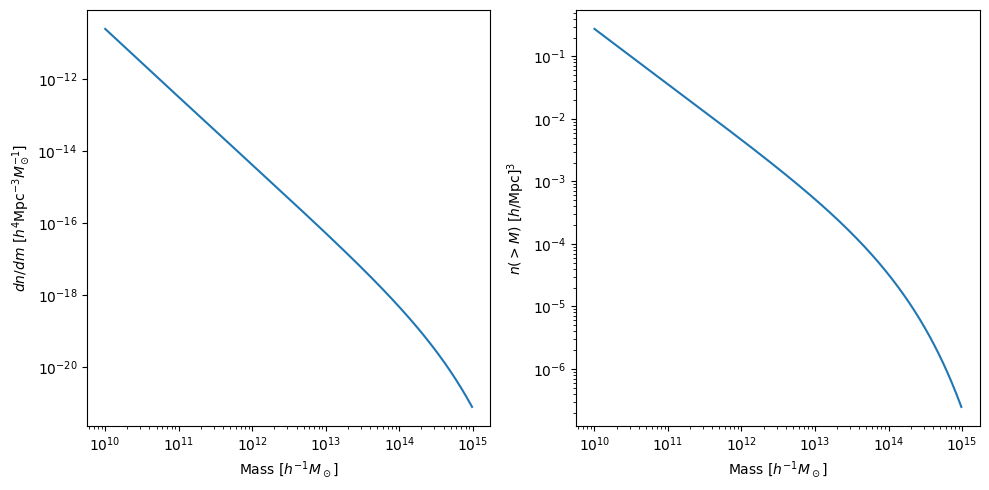

In [205]:
mf = MassFunction(z=0)
mass = mf.m
dndM = mf.dndm
n_gtm = mf.ngtm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(mass, dndM)
ax1.set_xlabel(r"Mass $[h^{-1}M_\odot]$")
ax1.set_ylabel(r"$dn/dm$ $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$")
ax1.set_xscale("log")
ax1.set_yscale("log")

ax2.plot(mass, n_gtm)
ax2.set_xlabel(r"Mass $[h^{-1}M_\odot]$")
ax2.set_ylabel(r"$n(>M)$ $[h/ \rm Mpc]^{3}$")
ax2.set_xscale("log")
ax2.set_yscale("log")

plt.tight_layout()
plt.show()

### Part B

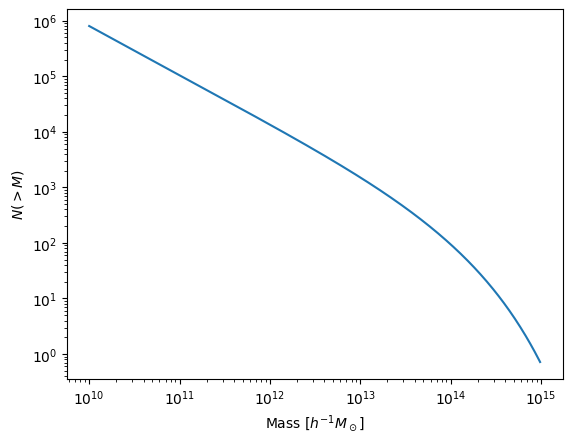

In [221]:
h = 0.7
V = (100 / h) ** 3  # (Mpc/h)^3

N_gtm = n_gtm * V

plt.plot(mass, N_gtm)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Mass $[h^{-1}M_\odot]$")
plt.ylabel(r"$N(>M)$")
plt.show()

In [222]:
# N of halos with mass > 1E14.85, 1E12.8

m1485 = 10**14.85
m128 = 10**12.8
print("N of halos with M>1E14.85: {}".format(int(np.sum(N_gtm[mass > m1485]))))
print("N of halos with M>1E12.8: {}".format(int(np.sum(N_gtm[mass > m128]))))

N of halos with M>1E14.85: 16
N of halos with M>1E12.8: 94495


### Part C

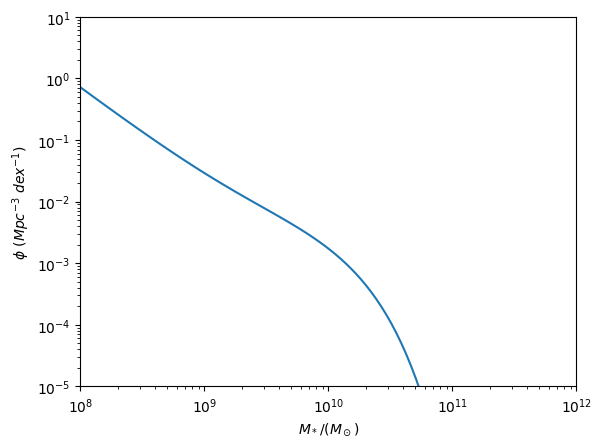

In [225]:
# Parameters from CFN Table 3.2 (pg.47)
Mu, alpha1, phi1, alpha2, phi2 = 1E10, -0.4, 0.004, -1.5, 0.0007

MM = np.logspace(8, 12, 100)
M_ratio = MM / Mu
phi_M = (phi1 * M_ratio ** alpha1 + phi2 * M_ratio ** alpha2) * np.exp(-M_ratio) # 3.12

plt.loglog(MM, phi_M)
plt.xlim(1E8, 1E12)
plt.ylim(1E-5, 1E1)
plt.xlabel(r"$ M_* / (M_\odot) $")
plt.ylabel(r"$ \phi \ (Mpc^{-3} \ dex^{-1}) $")
plt.show()

### Part D

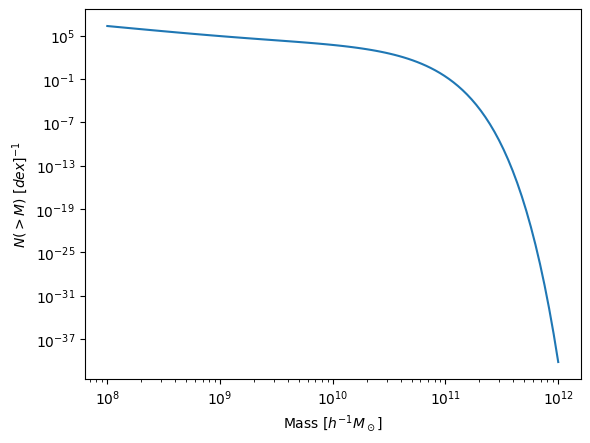

In [228]:
h = 0.7
V = (100 / h) ** 3  # (Mpc/h)^3

N_M = phi_M * V

plt.plot(MM, N_M)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Mass $[h^{-1}M_\odot]$")
plt.ylabel(r"$N(>M)$ $[dex]^{-1}$")
plt.show()

In [230]:
# N of halos with mass > 1E11.96, 1E10.96

m1196 = 10**11.96
m1096 = 10**10.96
print("N of halos with M>1E11.96: {}".format(np.sum(N_M[MM > m1196])))
print("N of halos with M>1E10.96: {}".format(np.sum(N_M[MM > m1096])))

N of halos with M>1E11.96: 6.883304049902732e-41
N of halos with M>1E10.96: 0.4205606240430243


### Part E

Intersection points:
(-0.41421356237309526, 0.17157287525381007)
(2.4142135623730954, 5.828427124746192)


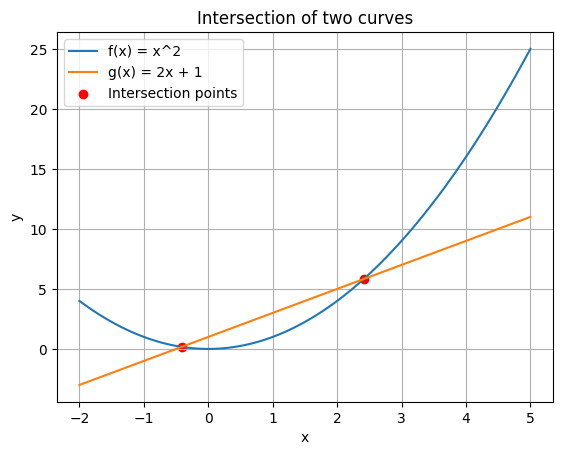

In [233]:
halo_mass = np.logspace(10, 15, 100)

# Example of finding overlap between two curves in python I found in google.

import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the curves
def f(x):
    return x**2

def g(x):
    return 2*x + 1

# Find the intersection points using fsolve
def find_intersection(f, g, x0):
    return fsolve(lambda x : f(x) - g(x), x0)

# Find the intersection points
x0 = [-1, 3] # Initial guesses
x_intersections = []
for x_guess in x0:
    x_intersection = find_intersection(f, g, x_guess)[0]
    if x_intersection not in x_intersections:
        x_intersections.append(x_intersection)

# Calculate the y coordinates of the intersection points
y_intersections = [f(x) for x in x_intersections]

# Print the intersection points
print("Intersection points:")
for i in range(len(x_intersections)):
    print(f"({x_intersections[i]}, {y_intersections[i]})")

# Plot the curves and the intersection points
x = np.linspace(-2, 5, 100)
plt.plot(x, f(x), label='f(x) = x^2')
plt.plot(x, g(x), label='g(x) = 2x + 1')
plt.scatter(x_intersections, y_intersections, color='red', label='Intersection points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersection of two curves')
plt.legend()
plt.grid(True)
plt.show()

# My head hurts

### Part F

# I rose too high, loved too hard, dared too much. I tried to grasp a star, overreached, and fell.

# Problem 3

### Part B

In [179]:
import sympy as sp
import numpy as np
import math as m
from scipy.special import iv, kv

In [180]:
rho, rho0, r, rs, M, M_r = sp.symbols('rho rho0 r rs M M_r', real=True, positive=True)
rho = rho0 / ( (r/rs) * ((1+(r/rs))**2) )
rho

rho0*rs/(r*(r/rs + 1)**2)

In [181]:
M_r = 4*sp.pi*rho*(r**2)
M_r = sp.integrate(M_r, (r, 0, r))
M_r # ahhh I need to redefine M(r), too many unknowns!

4*pi*rho0*rs**3*(rs/(r + rs) + log(r + rs)) - 4*pi*rho0*rs**3*(log(rs) + 1)

In [182]:
x, y, f = sp.symbols('x y f', real=True, positive=True)
rho = rho.subs(r,rs*x)
rho # subbed in the X

rho0/(x*(x + 1)**2)

In [183]:
M = 4*sp.pi*rho*((rs*x)**2)
M_x = sp.integrate(M, (x, 0, rs*x))
M_x # almost there, sub in the Y?

4*pi*rho0*rs**2*(log(rs*x + 1) + 1/(rs*x + 1)) - 4*pi*rho0*rs**2

In [184]:
M_y = M_x.subs(rs*x,y)
M_y

4*pi*rho0*rs**2*(log(y + 1) + 1/(y + 1)) - 4*pi*rho0*rs**2

In [185]:
M_y = M_y.subs(sp.log(y + 1) + (1 / (y + 1)), f)
M_y # Huh I will say that I needed to flip a sign in the f(y) expression to make this work.

4*pi*f*rho0*rs**2 - 4*pi*rho0*rs**2

In [186]:
M_y = sp.simplify(M_y)
M_y

4*pi*rho0*rs**2*(f - 1)

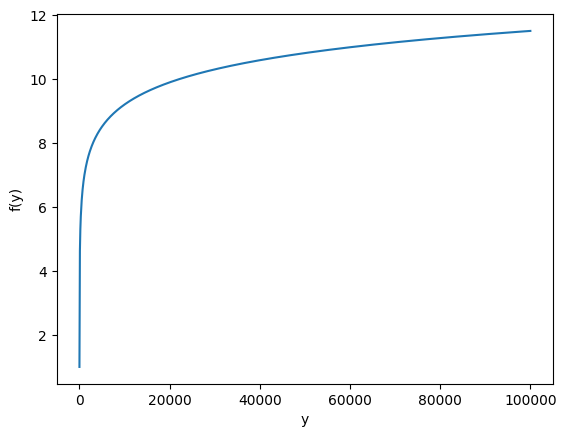

In [188]:
# My expression for M is in terms of f.... lets see how it behaves

yy = np.linspace(0,100000,1000)
f_y = np.log(yy + 1) + (1 / (yy + 1))
plt.plot(yy,f_y)
plt.xlabel(y)
plt.ylabel("f(y)")
plt.show() # Ah so for r<<rs, f=1 and for r>>rs, f=~10 (kinda asymptoting)

M(r) is 0 for r<<rs.

M(r) is the product of a constant (~10) and 4π*ρ0*rs^2 for r>>rs.

### Part C

In [189]:
phi, G, r = sp.symbols('phi G r', real=True, positive=True)

# need M(r) without all the x,y,f stuff

phi = - G * M_r / (r**2)
phi_r = sp.integrate(phi, (r, r, sp.oo))
phi_r

4*pi*G*rho0*rs**3*log(rs)/r - 4*pi*G*rho0*rs**3*log(r + rs)/r

### Part D

In [191]:
Vc, Mvir, Rvir, Vvir, c = sp.symbols('Vc Mvir Rvir Vvir c', real=True, positive=True)

Vc = (G * M_r / r)**0.5
#c = Rvir/rs
Vc = Vc.subs(rho0,Mvir / (4*sp.pi*(rs**3)*(sp.log(1+c)-(c/(1+c))))).subs(Mvir,(Vvir**2) * Rvir / G)
Vc

G**0.5*(Rvir*Vvir**2*(rs/(r + rs) + log(r + rs))/(G*(-c/(c + 1) + log(c + 1))) - Rvir*Vvir**2*(log(rs) + 1)/(G*(-c/(c + 1) + log(c + 1))))**0.5/r**0.5

In [192]:
# get rmax and Vmax

Vc_prime = sp.diff(Vc, r)
critical_points = sp.solve(Vc_prime, r)
Vc_double_prime = sp.diff(Vc_prime, r)

# The below logic is adopted from a google search
rmax = None
Vmax = float('-inf') # Initialize with negative infinity

for cc in critical_points:
    if Vc_double_prime.subs(r, cc) < 0: # Second derivative test for maximum
        if Vc.subs(r, cc) > Vmax:
            max_value = f.subs(r, cc)
            rmax = cc

if rmax is not None:
    print(f"Maximum critical point at x = {rmax}, value = {Vmax}")
else:
      print("No maximum critical point found.")

KeyboardInterrupt: 

In [ ]:
# Compare Vmax to Vvir
Vmax/Vvir

Hmmmmm, my Vc equation is really complicated. Sympy is having trouble figure out the roots of its derivatives.... GG

### Part E

In [193]:
# "MOUNTING" Google Drive to point to files
# downloaded from https://github.com/annayqho/ZTF20acigmel/tree/master/data
# into this directory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
Vtot, Vbulge, Vdisk, Vhalo = sp.symbols('Vtot Vbulge Vdisk Vhalo', real=True, positive=True)

r = sp.symbols('r', real=True, positive=True)

MH = 1.85E10 # Msol
a = 0.3 # kpc
G = 6.67E-11 # SI unit # CHECK
G = 4.3E-6 # (kpc * ((km/s)^2) / Msol)

Vbulge = (G * MH * (r/((r+a)**2))) ** 0.5

y, I0, I1, K0, K1 = sp.symbols('y I0 I1 K0 K1', real=True, positive=True)

Md = 4.8E10 # Msol
Rd = 2.7 # kpc
sigma0 = Md / (2*np.pi*Rd**2)

I0 = sp.besseli(0, y)
I1 = sp.besseli(1, y)
K0 = sp.besselk(0, y)
K1 = sp.besselk(1, y)

Vdisk = (4*np.pi*G*sigma0*Rd*(y**2)*((I0*K0)-(I1*K1))) ** 0.5
Vdisk = Vdisk.subs(y, r/(2*Rd))

Mhalo_r = sp.symbols('Mhalo_r', real=True, positive=True)

c = 10
Mvir = 1.5E12 # Msol

Del = 200 # 200 ly
rho = 1.37E2 # Msol/kpc^3
Rvir = ((3*Mvir)/(4*np.pi*Del*0.3*rho)) ** (1/3)

rs = Rvir/c
# density of enclosed mass for NFW profile I looked up
rho_s = Mvir / (( 4 * np.pi * (rs**3) ) * ( (sp.log(1+c)) - (c/(1+c) ) ))
# mass enclosed by radius r in profile
Mhalo_r = (4*np.pi*rho_s*rs**3) * (sp.log(1+(r/rs))-(r/(r+rs)))

Vhalo = (G*Mhalo_r/r) ** 0.5

Vtot = ((Vbulge**2) + (Vdisk**2) + (Vhalo**2)) ** 0.5

In [195]:
Vbulge

282.046095523409*r**0.5/(r + 0.3)**1.0

In [196]:
Vdisk

72.4092755487169*r**1.0*(besseli(0, 0.185185185185185*r)*besselk(0, 0.185185185185185*r) - besseli(1, 0.185185185185185*r)*besselk(1, 0.185185185185185*r))**0.5

In [197]:
Vhalo

2539.68501984006*(-r/(r + 35.1865708394541) + log(0.028419933404784*r + 1))**0.5/(r**0.5*(-0.909090909090909 + log(11))**0.5)

In [198]:
Vtot

2539.68501984006*((-r/(r + 35.1865708394541) + log(0.028419933404784*r + 1))**1.0/(r**1.0*(-0.909090909090909 + log(11))**1.0) + 0.0123333333333333*r**1.0/(r + 0.3)**2.0 + 0.000812884214804654*r**2.0*(besseli(0, 0.185185185185185*r)*besselk(0, 0.185185185185185*r) - besseli(1, 0.185185185185185*r)*besselk(1, 0.185185185185185*r))**1.0)**0.5

In [199]:
# "MOUNTING" Google Drive to point to files
# downloaded from https://github.com/annayqho/ZTF20acigmel/tree/master/data
# into this directory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


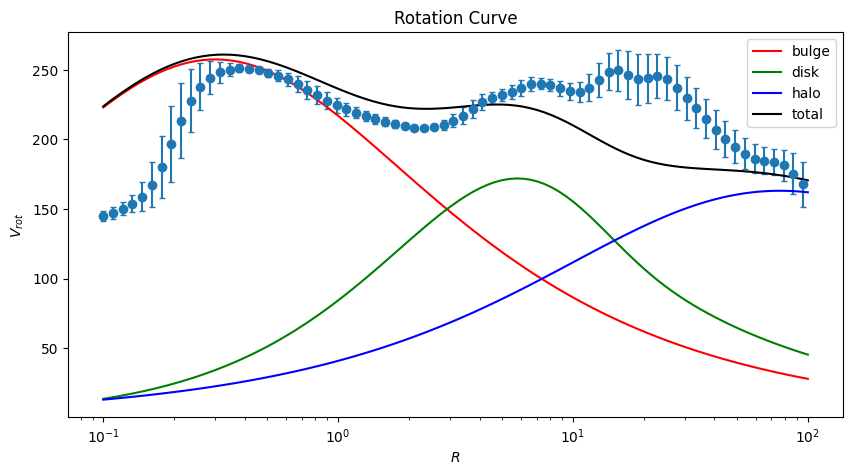

In [200]:
plt.figure(figsize=(10, 5))

# Plot experimental
rr, Vrot, Vrot_err = np.loadtxt("/content/drive/My Drive/Galaxy/rotation_curve_sofue_2020.txt").T # r (kpc), Vrot (km/s), Vrot_err (km/s)
plt.errorbar(rr, Vrot, yerr=Vrot_err, fmt='o', capsize=2)

# Plot theory
r_vals = np.logspace(-1, 2, 100)

f = sp.lambdify(r, Vbulge, modules=['numpy'])
Vb_vals = f(r_vals)
plt.plot(r_vals, Vb_vals, label="bulge", color="red")

bessel_map = {'besseli': iv,'besselk': kv}
f = sp.lambdify(r, Vdisk, modules=[bessel_map, 'numpy'])
Vd_vals = f(r_vals)
plt.plot(r_vals, Vd_vals, label="disk", color="green")

f = sp.lambdify(r, Vhalo, modules=['numpy'])
Vh_vals = f(r_vals)
plt.plot(r_vals, Vh_vals, label="halo", color="blue")

f = sp.lambdify(r, Vtot, modules=[bessel_map, 'numpy'])
Vt_vals = f(r_vals)
plt.plot(r_vals, Vt_vals, label="total", color="black")

plt.xlabel(r"$R$")
plt.ylabel(r"$V_{rot}$")
plt.title("Rotation Curve")
plt.legend()
plt.xscale('log')
plt.show()